In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('D:\dataset\id_205_1thang.csv', parse_dates=['DATA_AS_OF'], index_col='DATA_AS_OF')
#data = pd.read_csv('D:\dataset\id_205-speed-date.csv', parse_dates=['DATA_AS_OF'], index_col='DATA_AS_OF')
#data_end = int(np.floor(0.8*(data.shape[0])))
train = data.SPEED[1587:]
#77560 for all
#1587 for 1thang
train = train.values.reshape(-1)
test = data.SPEED[0:1587]
test = test.values.reshape(-1)
date_test = data.index[0:1587].values.reshape(-1)

In [3]:
def get_data(train,test,time_step,num_predict,date):
  x_train = list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test = list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [4]:
x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,30)

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

In [5]:
# Reshape lai cho dung model
x_train = x_train.reshape(-1,30,1)
y_train = y_train.reshape(-1,1)

#reshape lai cho test
x_test = x_test.reshape(-1,30,1)
y_test = y_test.reshape(-1,1)
date_test = date_test.reshape(-1,1)

In [6]:
#dau vao 30 doan 1
n_input = 30
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=1)
model.save('D:\Prediction\lstm-test')

Epoch 1/20
5172/5172 [==============================] - 80s 15ms/step - loss: 0.0144 - val_loss: 0.0101
Epoch 2/20
5172/5172 [==============================] - 76s 15ms/step - loss: 0.0092 - val_loss: 0.0075
Epoch 3/20
5172/5172 [==============================] - 77s 15ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 4/20
5172/5172 [==============================] - 75s 15ms/step - loss: 0.0074 - val_loss: 0.0067
Epoch 5/20
5172/5172 [==============================] - 76s 15ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 6/20
5172/5172 [==============================] - 76s 15ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 7/20
5172/5172 [==============================] - 76s 15ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 8/20
5172/5172 [==============================] - 77s 15ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 9/20
5172/5172 [==============================] - 76s 15ms/step - loss: 0.0060 - val_loss: 0.0065
Epoch 10/20
5172/5172 [==============================] - 80s 15m

INFO:tensorflow:Assets written to: D:\Prediction\lstm-test\assets


INFO:tensorflow:Assets written to: D:\Prediction\lstm-test\assets


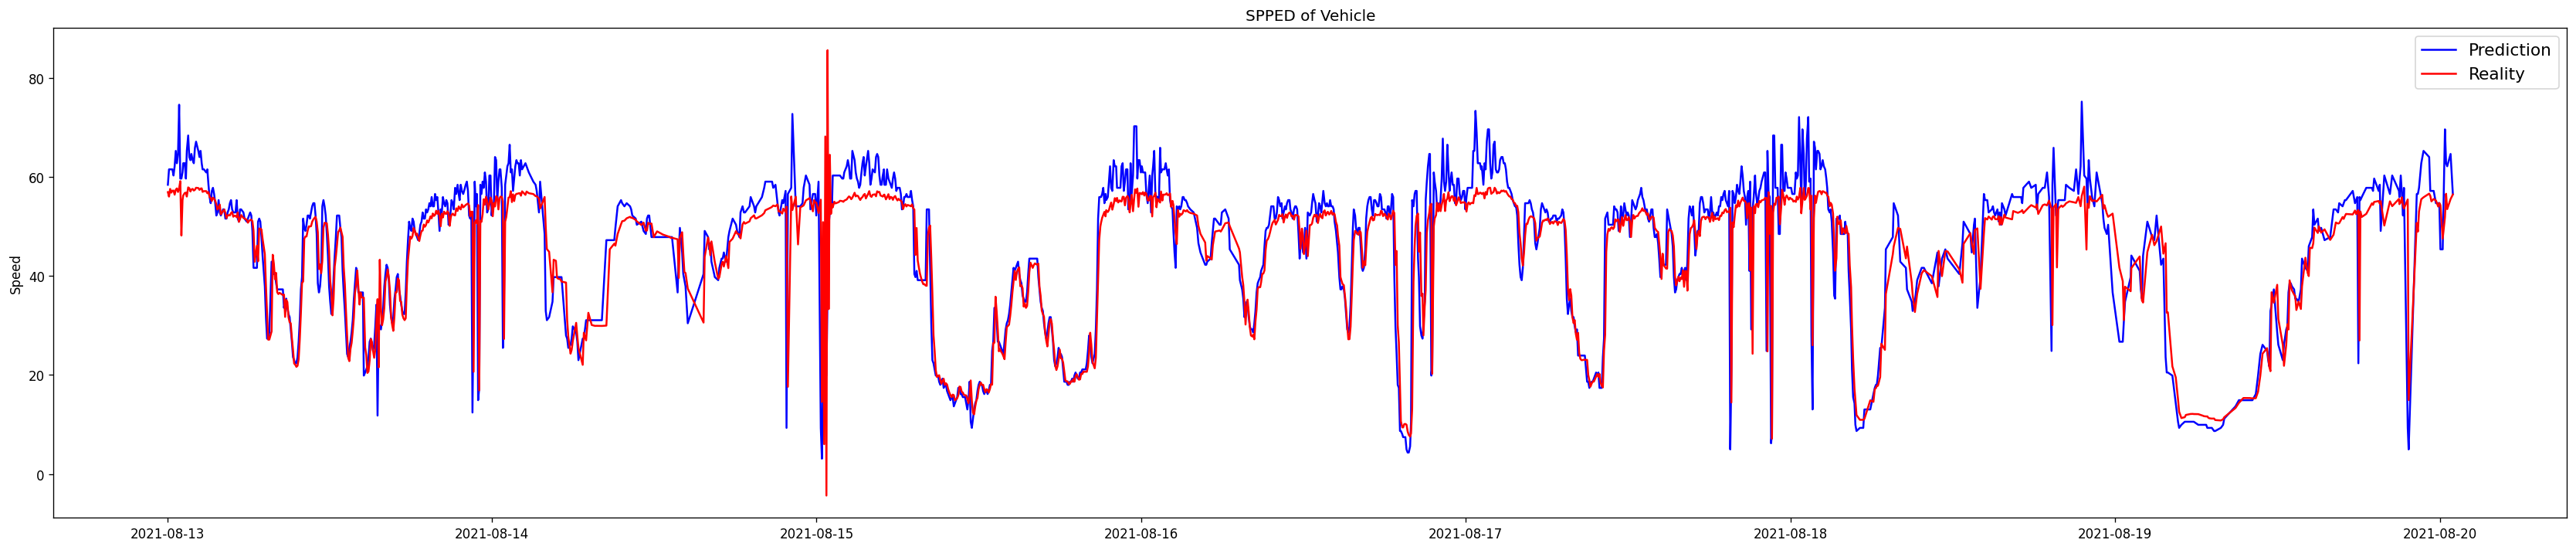

In [10]:
model = keras.models.load_model('D:\Prediction\lstm-test')

test_output = model.predict(x_test)
plt.rcParams.update({'figure.figsize':(35,7), 'figure.dpi':120})

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)

plt.plot(data.index[0:1556], test_2, color='b')
plt.plot(data.index[0:1556], test_1,  color='r')
#77529 for all

plt.title("SPPED of Vehicle")
#plt.xlabel("Time Stamp")
plt.ylabel("Speed")
plt.legend(('Prediction', 'Reality'),loc='upper right', fontsize=13)

plt.show()

In [12]:
score = model.evaluate(x_test, y_test)
print(score)

49/49 [==============================] - 1s 10ms/step - loss: 0.0086
0.008596949279308319
